In [25]:
import gboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
    data = gboost.data_clean()
    X, y = gboost.define_features_and_target(data, 'Fraud')
    X_train, X_test, y_train, y_test = gboost.split_data(X, y)

In [3]:
    gb_params = {
        'learning_rate' : [0.1, 0.01],
        'n_estimators' : [100, 500, 1000],
        'subsample' : [1, 0.5],
        'min_samples_split' : [2, 3],
        'max_depth' : [3, 5],
    }

In [4]:
    lr_params = {
        'C' : [1, 0.1]
    }

In [5]:
   recall_scorer = make_scorer(gboost.score_model, greater_is_better=True)

In [6]:
    gb = GradientBoostingClassifier()
    lr = LogisticRegression()

In [10]:
    gscv = GridSearchCV(gb, param_grid=gb_params,
                        scoring=recall_scorer,
                        cv=3,
                        n_jobs=-1)

In [11]:
    clf = gscv.fit(X_train, y_train)

In [12]:
clf.best_score_

0.6724178142549021

In [13]:
predictions = clf.predict(X_test)
recall_score(y_test, predictions)

0.6612377850162866

In [21]:
predicted_probs = clf.predict_proba(X_test)[:,1]

In [22]:
roc_auc_score(y_test, predicted_probs)

0.9416497904299317

In [28]:
fpr, tpr, thresh = roc_curve(y_test, predicted_probs)

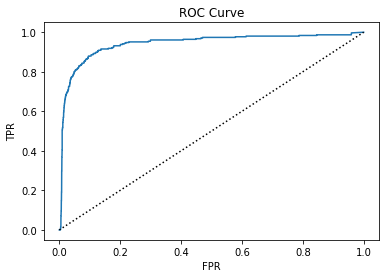

In [29]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k:')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");